# Maxey in 76ers & Two-man play with Joel Embiid

### Overview

* This notebook involves different lineups' data in 76ers this season and some data about the P&R of Maxey and Embiid:
    1. 76ers_ballhandler.csv: team data of the ball handler
    2. 76ers_rollman.csv: team data of the roll man
    3. handoff.csv: data of handoffs of different players
    4. P&R_ballhandler.csv: data of ball handlers in season 23-24
    5. P&R_rollman.csv: data of roll man in season 23-24
    6. lineups.csv: data of two-men lineups in 76ers this season
    7. lineups5.csv / lineups5basic.csv: data of five-men lineups in 76ers this season
    8. lineups2all.csv: data of two-men lineups in all teams this season
    9. screen_assists.csv: data of screen assists of some key players in the league
    10. 76ers_handoff.csv: team data of handoffs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Five-men lineups
lineup_5=pd.read_csv('../data/lineups5.csv') # I need to clean the data

In [3]:
lineup_5 = lineup_5.rename(columns={'%FGA': '%FGA2PT', '%FGA.1': '%FGA3PT', '%PTS': '2PT', '%PTS.1': '%PTS2PTMR', '%PTS.2': '%PTS3PT', '%PTS.3': '%PTSFBPS'})
lineup_5 = lineup_5.rename(columns={'%PTS.4': '%PTSFT', '%PTS.5': '%PTSOFFTO', '%PTS.6': '%PTSPITP', '2FGM': '2FGM%AST', '2FGM.1': '2FGM%UAST'})
lineup_5 = lineup_5.rename(columns={'3FGM': '3FGM%AST', '3FGM.1': '2FGM%UAST', 'FGM': 'FGM%AST', 'FGM.1': 'FGM%UAST'})
lineup_5 = lineup_5.drop(0)
lineup_5.head() # I found the dataset wrong. It's an "advanced" dataset but I need basic data.

,LINEUPS,TEAM,GP,MIN,%FGA2PT,%FGA3PT,2PT,%PTS2PTMR,%PTS3PT,%PTSFBPS,%PTSFT,%PTSOFFTO,%PTSPITP,2FGM%AST,2FGM%UAST,3FGM%AST,2FGM%UAST,FGM%AST,FGM%UAST
1,P. Tucker - T. Harris - J. Embiid - D. Melton ...,PHI,3.0,16.4,57.5,42.5,41.7,8.3,40,13.3,18.3,13.3,33.3,52,48,93.8,6.3,68.3,31.7
2,N. Batum - T. Harris - J. Embiid - D. Melton -...,PHI,7.0,13.8,56.4,43.6,42,6.3,37.8,14.3,20.3,9.4,35.7,58.3,41.7,86.1,13.9,68.8,31.3
3,T. Harris - J. Embiid - K. Oubre Jr. - D. Melt...,PHI,7.0,13.1,63.6,36.4,55.7,4.3,23.5,18.3,20.9,15.2,51.3,53.1,46.9,94.4,5.6,62.2,37.8
4,T. Harris - R. Covington - J. Embiid - D. Melt...,PHI,7.0,9.7,68.8,31.2,52.4,4.9,29.3,20.1,18.3,5.5,47.6,60.5,39.5,87.5,12.5,67.8,32.2
5,T. Harris - R. Covington - T. Maxey - P. Reed ...,PHI,1.0,8.1,61.5,38.5,52.2,0,39.1,17.4,8.7,17.4,52.2,33.3,66.7,66.7,33.3,44.4,55.6


* Glossary: 
    1. GP:Games Played
    2. MIN: Minutes Played
    3. %FGA2PT: Percent of Field Goals Attempted (2 Pointers)
    4. %FGA3PT: Percent of Field Goals Attempted (3 Pointers)
    5. %PTS2PT: Percent of Points (2 Pointers)
    6. %PTS2PTMR: Percent of Points (Mid-Range)
    7. %PTS3PT: Percent of Points (3 Pointers)
    8. %PTSFBPS: Percent of Points (Fast Break Points)
    9. %PTSFT: Percent of Points (Free Throws)
    10. %PTSOFFTO: Percent of Points (Off Turnovers)
    11. %PTSPITP: Percent of Points (Points in the Paint)
    12. 2FGM%AST: Percent of 2 Point Field Goals Made Assisted
    13. 2FGM%UAST: Percent of 2 Point Field Goals Made Unassisted
    14. 3FGM%AST: Percent of 3 Point Field Goals Made Assisted
    15. 3FGM%UAST: Percent of 3 Point Field Goals Made Unassisted
    16. FGM%AST: Percent of Point Field Goals Made Assisted
    17. FGM%UAST: Percent of Point Field Goals Made Unassisted

In [4]:
lineup_5basic=pd.read_csv('../data/lineups5basic.csv')

In [5]:
# Basic data of 5-player lineups sorted by minutes played
for index, row in lineup_5basic.iterrows():
    if 'Tucker' in row['LINEUPS']:
        lineup_5basic=lineup_5basic.drop(index) # Tucker is not in the team so we need to kick him out
# sorted by games played first and then minutes per game
lineup_5clean=lineup_5basic[['LINEUPS', 'GP', 'MIN', 'PTS', 'FG%', '3PA', '3P%', 'AST', 'TOV', '+/-']].sort_values(by=['GP', 'MIN'], ascending=[False, False])

In [6]:
lineup_5clean.head()

,LINEUPS,GP,MIN,PTS,FG%,3PA,3P%,AST,TOV,+/-
1,N. Batum - T. Harris - J. Embiid - D. Melton -...,7,13.8,40.9,51.1,11.7,43.9,9.4,3.1,7.7
2,T. Harris - J. Embiid - K. Oubre Jr. - D. Melt...,7,13.1,32.9,47.4,9.0,28.6,7.3,3.4,-1.7
3,T. Harris - R. Covington - J. Embiid - D. Melt...,7,9.7,23.4,47.2,5.6,41.0,5.7,2.7,-1.9
24,P. Beverley - T. Harris - J. Embiid - K. Oubre...,4,3.8,9.3,44.1,1.8,42.9,1.3,0.3,1.5
6,P. Beverley - T. Harris - J. Embiid - D. Melto...,3,7.2,14.7,43.6,5.7,17.6,3.3,1.7,-2.7


In [7]:
# With both Embiid and Maxey
lineup_5both = lineup_5clean[lineup_5clean['LINEUPS'].str.contains('Embiid') & lineup_5clean['LINEUPS'].str.contains('Maxey')]
lineup_5both

,LINEUPS,GP,MIN,PTS,FG%,3PA,3P%,AST,TOV,+/-
1,N. Batum - T. Harris - J. Embiid - D. Melton -...,7,13.8,40.9,51.1,11.7,43.9,9.4,3.1,7.7
2,T. Harris - J. Embiid - K. Oubre Jr. - D. Melt...,7,13.1,32.9,47.4,9.0,28.6,7.3,3.4,-1.7
3,T. Harris - R. Covington - J. Embiid - D. Melt...,7,9.7,23.4,47.2,5.6,41.0,5.7,2.7,-1.9
24,P. Beverley - T. Harris - J. Embiid - K. Oubre...,4,3.8,9.3,44.1,1.8,42.9,1.3,0.3,1.5
6,P. Beverley - T. Harris - J. Embiid - D. Melto...,3,7.2,14.7,43.6,5.7,17.6,3.3,1.7,-2.7
27,T. Harris - J. Embiid - D. Melton - T. Maxey -...,3,3.8,10.0,57.1,2.3,28.6,2.7,1.0,-0.3
16,P. Beverley - M. Morris Sr. - R. Covington - J...,2,4.5,6.0,23.1,3.0,0.0,1.0,1.5,-4.0
32,N. Batum - T. Harris - J. Embiid - K. Oubre Jr...,2,3.6,10.0,50.0,1.5,33.3,1.5,1.5,4.0
38,N. Batum - M. Morris Sr. - J. Embiid - D. Melt...,2,3.3,13.5,69.2,2.5,100.0,3.5,0.0,5.5
23,P. Beverley - J. Embiid - D. House Jr. - T. Ma...,1,3.8,14.0,62.5,2.0,50.0,4.0,1.0,3.0


Maxey and Embiid are in the 5-man lineups that played for the most minutes and games, indicating their important status in the team. The Embiid-Maxey pair is the most used weapon of the 76ers, and they present a generally positive influence to the team as most of the "+/-" with them are above 0. In the most frequent 5-man lineup, they win an average of 7.7 points in their 13.8-minute play per game.

In [30]:
# With only Embiid
lineup_5Embiid = lineup_5clean[lineup_5clean['LINEUPS'].str.contains('Embiid')&~lineup_5clean['LINEUPS'].str.contains('Maxey')]
lineup_5Embiid

,LINEUPS,GP,MIN,PTS,FG%,3PA,3P%,AST,TOV,+/-
34,P. Beverley - T. Harris - J. Embiid - K. Oubre...,2,3.6,12.0,61.1,3.0,33.3,5.0,0.5,5.5
46,P. Beverley - R. Covington - J. Embiid - F. Ko...,2,3.1,1.5,12.5,2.0,25.0,0.0,2.5,-3.0
12,P. Beverley - M. Morris Sr. - J. Embiid - D. H...,1,5.2,19.0,62.5,3.0,33.3,3.0,1.0,4.0
29,N. Batum - P. Beverley - R. Covington - J. Emb...,1,3.7,9.0,50.0,3.0,33.3,3.0,0.0,6.0
31,D. Green - T. Harris - J. Embiid - K. Oubre Jr...,1,3.6,11.0,62.5,3.0,33.3,3.0,0.0,-3.0
33,P. Beverley - R. Covington - J. Embiid - D. Ho...,1,3.6,8.0,42.9,1.0,0.0,3.0,1.0,2.0
35,P. Beverley - J. Embiid - K. Oubre Jr. - D. Ho...,1,3.5,11.0,80.0,1.0,100.0,1.0,1.0,-6.0
39,P. Beverley - J. Embiid - F. Korkmaz - D. Melt...,1,3.3,7.0,0.0,1.0,0.0,0.0,2.0,2.0
45,P. Beverley - J. Embiid - K. Oubre Jr. - F. Ko...,1,3.1,6.0,33.3,2.0,50.0,2.0,0.0,0.0
49,N. Batum - R. Covington - J. Embiid - D. Melto...,1,3.0,9.0,75.0,3.0,66.7,1.0,1.0,3.0


It seems the coach avoid using Embiid on the field without Maxey, so the sample is too small to analyze.

In [9]:
# With only Maxey
lineup_5Maxey= lineup_5clean[~lineup_5clean['LINEUPS'].str.contains('Embiid')& lineup_5clean['LINEUPS'].str.contains('Maxey')]
lineup_5Maxey

,LINEUPS,GP,MIN,PTS,FG%,3PA,3P%,AST,TOV,+/-
10,N. Batum - M. Morris Sr. - T. Harris - D. Melt...,3,5.8,12.7,44.1,5.0,33.3,2.7,2.0,-7.3
17,P. Beverley - T. Harris - D. House Jr. - T. Ma...,3,4.4,11.7,57.7,1.7,40.0,1.3,1.7,2.3
19,P. Beverley - T. Harris - K. Oubre Jr. - T. Ma...,3,4.1,7.7,30.0,1.7,0.0,0.7,2.0,0.7
21,N. Batum - T. Harris - T. Maxey - P. Reed - J....,3,4.0,11.3,54.2,2.3,57.1,3.0,0.7,1.7
8,N. Batum - P. Beverley - M. Morris Sr. - T. Ma...,2,6.5,21.5,55.2,7.5,53.3,5.5,0.0,12.5
9,T. Harris - D. House Jr. - T. Maxey - P. Reed ...,2,5.9,8.5,26.1,5.0,30.0,1.0,1.5,-5.5
11,P. Beverley - M. Morris Sr. - R. Covington - T...,2,5.3,14.5,52.6,4.0,62.5,3.5,1.0,0.0
20,T. Harris - R. Covington - K. Oubre Jr. - T. M...,2,4.1,12.0,60.0,2.5,60.0,2.0,1.0,5.0
30,P. Beverley - K. Oubre Jr. - D. House Jr. - T....,2,3.7,11.0,50.0,2.5,20.0,1.5,0.5,4.0
48,T. Harris - D. Melton - T. Maxey - P. Reed - J...,2,3.1,7.5,41.7,1.0,50.0,0.5,0.5,-2.5


Maxey, in contrast, in a little more placed on the filed without Embiid compared to the situation before. However, the sample is still very small, and the most frequent lineup where Maxey plays without Embiid lost 7.3 points in average during their 5.8-minute play per game. It seems Both Maxey and Embiid are more likely to be put on the field together by the coach, and lineups with Maxey and without Embiid doesn't have a very good outcome.

In [10]:
# Two-men lineups
lineup_2=pd.read_csv('../data/lineups.csv')
lineup_2.shape #I need to clean the data

(25, 18)

In [11]:
for index, row in lineup_2.iterrows():
    if 'Tucker' in row['LINEUPS']:
        lineup_2=lineup_2.drop(index) # Tucker is not in the team so we need to kick him out
lineup_2.shape # It seems that the dataset I select don't have Tucker already

(25, 18)

* Glossary:
    1. OFFRTG: Offensive Rating
    2. DEFRTG: Defensive Rating
    3. NETRTG: Net Rating
    4. AST%: Assist Percentage
    5. AST/TO: Assist to Turnover Ratio
    6. AST RATIO: Assist Ratio
    7. OREB%: Offensive Rebounding Percentage
    8. DREB%: Defensive Rebounding Percentage
    9. REB%: Rebounding Percentage
    10. TO RATIO: Turnover Ratio
    11. EFG%: Effective Field Goal Percentage
    12. TS%: True Shooting Percentage
    13. PACE: Pace
    14. PIE: Player Impact Estimate

In [12]:
# Minutes played
lineup_2[['LINEUPS', 'GP', 'MIN', 'OFFRTG', 'NETRTG', 'AST%', 'TS%', 'PACE', 'PIE']].sort_values(by=['MIN'], ascending=[False]).head(5)

,LINEUPS,GP,MIN,OFFRTG,NETRTG,AST%,TS%,PACE,PIE
0,T. Harris - T. Maxey,18,583,119.3,4.5,59.9,59.6,100.66,50.8
1,T. Harris - D. Melton,19,482,121.2,3.0,63.1,60.8,102.14,50.6
2,D. Melton - T. Maxey,18,436,122.3,4.2,64.6,61.5,102.25,51.4
3,J. Embiid - D. Melton,16,435,122.4,7.0,66.1,61.3,102.15,52.8
4,J. Embiid - T. Maxey,16,435,123.2,9.2,64.9,61.1,100.98,54.2


Surprisingly, Embiid and Maxey is only the fifth most-time pair. Among the top five 5 most-time pairs, Embiid and Maxey have the highest offensive rating, net rating and player impact estimate.

In [13]:
# Top 5 offensive rating 2-man lineups in 76ers
lineup_2[['LINEUPS', 'GP', 'MIN', 'OFFRTG', 'NETRTG', 'AST%', 'TS%', 'PACE', 'PIE']].sort_values(by=['OFFRTG'], ascending=[False]).head(5)

,LINEUPS,GP,MIN,OFFRTG,NETRTG,AST%,TS%,PACE,PIE
19,N. Batum - J. Embiid,8,159,136.1,25.9,69.3,66.0,101.36,62.6
17,N. Batum - D. Melton,10,161,132.8,11.7,66.7,65.3,103.69,53.6
11,N. Batum - T. Harris,10,183,130.3,12.4,64.9,62.8,102.35,53.5
7,N. Batum - T. Maxey,10,212,130.2,13.0,62.0,61.9,101.97,52.9
4,J. Embiid - T. Maxey,16,435,123.2,9.2,64.9,61.1,100.98,54.2


Interestingly, Batum seems to be the best offensive role player in 76ers. But without him on the field, Embiid and Maxey are still the most reliable pair.

In [14]:
# Top 5 true shooting percentage 2-man lineups in 76ers
lineup_2[['LINEUPS', 'GP', 'MIN', 'OFFRTG', 'NETRTG', 'AST%', 'TS%', 'PACE', 'PIE']].sort_values(by=['TS%'], ascending=[False]).head(5)

,LINEUPS,GP,MIN,OFFRTG,NETRTG,AST%,TS%,PACE,PIE
19,N. Batum - J. Embiid,8,159,136.1,25.9,69.3,66.0,101.36,62.6
17,N. Batum - D. Melton,10,161,132.8,11.7,66.7,65.3,103.69,53.6
11,N. Batum - T. Harris,10,183,130.3,12.4,64.9,62.8,102.35,53.5
20,T. Harris - R. Covington,14,157,121.2,10.3,62.7,62.8,100.79,53.4
7,N. Batum - T. Maxey,10,212,130.2,13.0,62.0,61.9,101.97,52.9


Batum dominates the shooting percentage again, but he is a role player and the sample size is quite small (no more than 10 games) so we can't say he is the best offensive player in 76ers. As a 3-point shooter, Batum has a wonderful performance recently, way above his average, which means he perhaps cannot keep this efficiency.

In [15]:
# Top 5 player impact estimate
lineup_2[['LINEUPS', 'GP', 'MIN', 'OFFRTG', 'NETRTG', 'AST%', 'TS%', 'PACE', 'PIE']].sort_values(by=['PIE'], ascending=[False]).head(5)

,LINEUPS,GP,MIN,OFFRTG,NETRTG,AST%,TS%,PACE,PIE
19,N. Batum - J. Embiid,8,159,136.1,25.9,69.3,66.0,101.36,62.6
13,P. Beverley - T. Maxey,17,173,118.0,14.9,52.0,57.2,97.79,56.8
12,P. Beverley - J. Embiid,16,178,110.2,9.6,64.7,54.1,100.02,55.0
4,J. Embiid - T. Maxey,16,435,123.2,9.2,64.9,61.1,100.98,54.2
5,T. Harris - J. Embiid,16,430,122.8,9.4,65.7,60.9,101.24,54.1


Except the shooting percentage, the Embiid-Maxey pair are all among the top 5 in offensive data. Considering their long playing time, their stability and efficiency are both very reliable.

In [49]:
# In the league
lineup_2all=pd.read_csv('../data/lineups2all.csv')

In [34]:
# Minutes played rank
lineup_2all.sort_values(by=['MIN'], ascending=[False])
lineup_2all[lineup_2all["TEAM"]=="PHI"]

,LINEUPS,TEAM,GP,MIN,OFFRTG,DEFRTG,NETRTG,AST%,AST/TO,AST RATIO,OREB%,DREB%,REB%,TO RATIO,EFG%,TS%,PACE,PIE
4,T. Harris - T. Maxey,PHI,18,583,119.3,114.9,4.5,59.9,1.90,18.3,30.7,71.7,51.4,0.1,54.6,59.6,100.66,50.8
34,T. Harris - D. Melton,PHI,19,482,121.2,118.2,3.0,63.1,2.16,19.3,29.5,73.0,50.9,0.1,55.9,60.8,102.14,50.6
64,D. Melton - T. Maxey,PHI,18,436,122.3,118.1,4.2,64.6,2.19,19.6,29.8,71.7,50.7,0.1,56.4,61.5,102.25,51.4
65,J. Embiid - D. Melton,PHI,16,435,122.4,115.3,7.0,66.1,2.29,19.7,30.0,74.6,52.4,0.1,55.9,61.3,102.15,52.8
66,J. Embiid - T. Maxey,PHI,16,435,123.2,113.9,9.2,64.9,2.34,19.5,31.2,74.2,53.0,0.1,55.6,61.1,100.98,54.2
76,T. Harris - J. Embiid,PHI,16,430,122.8,113.5,9.4,65.7,2.42,19.9,29.5,74.8,52.6,0.1,55.7,60.9,101.24,54.1


Embiid-Maxey is the 66th most-time pair among the 100 most-time pairs in the league.

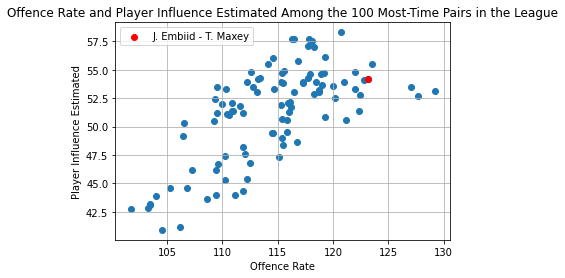

In [52]:
# Offence rate rank and Player influence estimated rank
plt.scatter(lineup_2all['OFFRTG'], lineup_2all['PIE'])
plt.scatter(lineup_2all['OFFRTG'].iloc[lineup_2all[lineup_2all['LINEUPS'] == 'J. Embiid - T. Maxey'].index[0]], lineup_2all['PIE'].iloc[lineup_2all[lineup_2all['LINEUPS'] == 'J. Embiid - T. Maxey'].index[0]], color='red', label='J. Embiid - T. Maxey', marker='o')
plt.title('Offence Rate and Player Influence Estimated Among the 100 Most-Time Pairs in the League')
plt.xlabel('Offence Rate')
plt.ylabel('Player Influence Estimated')
plt.legend()
plt.grid(True)
plt.show()

A pretty great place.

In [20]:
# 76ers ball handler data and Maxey's personal ball handler data
ballhandler_76ers=pd.read_csv('../data/76ers_ballhandler.csv')
ballhandler_player=pd.read_csv('../data/P&R_ballhandler.csv')

In [21]:
# Fisrt I need to clean the data because the keys are separated into two rows
ballhandler_76ers = ballhandler_76ers.rename(columns={'FT': 'FTFREQ%', 'TOV': 'TOVFREQ%', 'SF': 'SFFREQ%', 'SCORE': 'SCOREFREQ%'})
ballhandler_76ers=ballhandler_76ers.drop(0)
ballhandler_76ers.head()

,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE
1,Charlotte Hornets,18.0,24.3,21.4,0.86,20.9,8.3,19.1,43.6,49.0,6.6,16.2,5.9,1.6,39.1,41.4
2,Atlanta Hawks,19.0,23.7,20.1,1.01,23.9,8.4,18.1,46.5,54.8,10.7,14.2,7.8,1.3,44.9,93.1
3,Chicago Bulls,21.0,21.7,19.8,0.90,19.4,7.4,16.8,43.9,47.7,10.5,13.6,9.9,1.8,42.6,55.2
4,Cleveland Cavaliers,20.0,21.9,19.7,0.90,19.6,7.5,16.9,44.4,48.8,9.6,14.4,8.9,1.4,41.9,51.7
5,New York Knicks,19.0,21.7,19.4,0.96,20.8,7.7,17.5,44.3,50.2,10.7,11.7,10,2.9,43.4,82.8


* Glossary
    1. POSS: Possessions
    2. FREQ%: Frequency
    3. PPP: Points Per Possession
    4. PTS:Points
    5. FGM: Field Goals Made
    6. EFG%: Effective Field Goal Percentage
    7. FTFREQ%: Free Throw Frequency
    8. TOVFREQ%: Turnover Frequency
    9. SFFREQ%: Shooting Foul Frequency
    10. AND ONE: And One Frequency
    11. SCOREFREQ%: Score Frequency

In [22]:
# Same thing to Maxey's personal data
ballhandler_player = ballhandler_player.rename(columns={'FT': 'FTFREQ%', 'TOV': 'TOVFREQ%', 'SF': 'SFFREQ%', 'SCORE': 'SCOREFREQ%'})
ballhandler_player=ballhandler_player.drop(0)
ballhandler_player.head()

,PLAYER,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE
1,T.J. McConnell,IND,12.0,4.2,57.5,1.18,4.9,2.2,3.4,65.9,65.9,6,12,6,0,60,95.1
2,Trae Young,ATL,18.0,13.4,48.8,1.03,13.8,4.5,9.7,46.3,55.1,14.9,14.5,11.2,2.1,46.5,81.5
3,LaMelo Ball,CHA,15.0,11.8,46.5,0.98,11.5,4.5,9.3,47.9,55.4,7.9,15.8,6.8,2.8,42.9,72.8
4,Skylar Mays,POR,14.0,4.1,46.4,0.83,3.4,1.4,3.6,40.0,41.0,6.9,8.6,5.2,1.7,39.7,44.0
5,Jalen Brunson,NYK,19.0,10.4,46.2,0.97,10.1,3.9,9.1,42.8,50.0,7.1,8.6,6.6,3,41.4,70.7


In [23]:
# I will put 76ers's data and Maxey's data together to make a comparison from the two datasets
a=ballhandler_76ers.tail(1)

In [24]:
b=ballhandler_player.tail(5)

In [25]:
ballhandler_merged=pd.concat([a, b], ignore_index=True)
ballhandler_merged.head(2)

,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE,PLAYER,AND ONE
0,Philadelphia 76ers,19.0,16.6,14.7,0.95,15.8,5.7,13.3,42.7,49.6,11.4,12.3,10.4,3.8,41.5,75.9,NaN,NaN
1,PHI,18.0,8.8,37.3,0.93,8.2,3.1,7.6,40.4,47.4,8.2,9.4,7.5,NaN,39.6,63.6,Tyrese Maxey,3.1


Among all the ballhandler plays in 76ers, Maxey have more than half of the possesions. Maxey has 37.3% frequency of ballhandler playing while 76ers only has 14.7%. However, Maxey isn't that efficient, only 0.93 points per possession while the whole team 0.95 points per possession.

In [26]:
# The same to roll-man play both in 76ers and Joel Embiid
rollman_76ers=pd.read_csv('../data/76ers_rollman.csv')
rollman_player=pd.read_csv('../data/P&R_rollman.csv')

In [ ]:
rollman_76ers = rollman_76ers.rename(columns={'FT': 'FTFREQ%', 'TOV': 'TOVFREQ%', 'SF': 'SFFREQ%', 'SCORE': 'SCOREFREQ%'})
rollman_76ers=rollman_76ers.drop(0)

In [55]:
rollman_76ers.head(5)

,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE
1,Houston Rockets,17.0,10.0,9.2,1.10,11.0,4.5,8.4,53.1,57.0,10.6,7.6,9.4,2.4,52.4,44.8
2,Chicago Bulls,21.0,8.2,7.5,0.99,8.1,3.5,7.0,49.3,53.0,7,8.7,7,1.7,47.1,6.9
3,Los Angeles Lakers,21.0,7.7,7.0,1.13,8.7,3.4,6.0,56.3,58.3,15.4,10.5,14.2,3.7,55.6,55.2
4,Philadelphia 76ers,19.0,7.9,7.0,1.17,9.3,3.4,6.5,52.0,59.3,13.2,8.6,11.3,3.3,52.3,62.1
5,Indiana Pacers,18.0,7.6,6.5,1.35,10.2,3.7,6.4,57.4,69.1,13.2,5.9,13.2,3.7,57.4,96.6


In [ ]:
rollman_player = rollman_player.rename(columns={'FT': 'FTFREQ%', 'TOV': 'TOVFREQ%', 'SF': 'SFFREQ%', 'SCORE': 'SCOREFREQ%'})
rollman_player=rollman_player.drop(0)

In [57]:
rollman_player.tail(5)

,PLAYER,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE
41,Jusuf Nurkic,PHX,20.0,2.5,18.8,0.90,2.2,0.9,2.0,46.2,48.7,10.2,14.3,10.2,4.1,42.9,13.5
42,Jonas Valanciunas,NOP,21.0,2.3,18.6,1.38,3.1,1.3,2.1,63.6,68.2,8.3,2.1,6.3,2.1,64.6,83.3
43,Danilo Gallinari,WAS,17.0,1.3,18.6,1.09,1.4,0.6,1.2,47.6,52.4,4.5,0,0,0,50,42.7
44,Larry Nance Jr.,NOP,14.0,0.8,18.6,1.18,0.9,0.4,0.8,54.5,59.1,0,0,0,0,54.5,54.7
45,Joel Embiid,PHI,16.0,5.4,18.3,1.08,5.9,2.1,4.2,49.3,52.2,16.1,9.2,12.6,2.3,51.7,38.5


In [61]:
rollman_merged=pd.concat([rollman_76ers.head(4), rollman_player.tail(1)], ignore_index=True)
rollman_merged.tail(2)

,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE,PLAYER,AND ONE
3,Philadelphia 76ers,19.0,7.9,7.0,1.17,9.3,3.4,6.5,52.0,59.3,13.2,8.6,11.3,3.3,52.3,62.1,NaN,NaN
4,PHI,16.0,5.4,18.3,1.08,5.9,2.1,4.2,49.3,52.2,16.1,9.2,12.6,NaN,51.7,38.5,Joel Embiid,2.3


76ers has 7.9 roll man plays per game and 5.4 of them are from Embiid whose frequency as an frequency as an roll man is more than twice higher than the team. He gets 1.08 points per play which is pretty efficient.

In [63]:
# Handoffs
handoff = pd.read_csv('../data/handoff.csv')
# Clean the data
handoff = handoff.rename(columns={'FT': 'FTFREQ%', 'TOV': 'TOVFREQ%', 'SF': 'SFFREQ%', 'SCORE': 'SCOREFREQ%'})
handoff=handoff.drop(0)
handoff.head()

,PLAYER,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%,PERCENTILE
1,Kevin Huerter,SAC,17.0,3.4,28.3,1.14,3.9,1.4,3.2,42.6,58.3,3.4,3.4,3.4,0,43.1,76.1
2,Keegan Murray,SAC,14.0,2.9,20.1,0.65,1.9,0.7,2.6,27.8,36.1,0,10,0,0,25,15.0
3,Seth Curry,DAL,15.0,0.7,17.2,1.36,1.0,0.4,0.7,54.5,63.6,9.1,0,9.1,9.1,54.5,91.2
4,Kentavious Caldwell-Pope,DEN,21.0,1.7,16.1,1.19,2.0,0.9,1.5,59.4,64.1,2.8,8.3,0,0,55.6,80.5
5,Julian Strawther,DEN,18.0,0.8,14.6,1.50,1.2,0.4,0.6,63.6,72.7,21.4,0,14.3,0,71.4,96.4


In [64]:
# Team data of handoff
handoff_76ers = pd.read_csv('../data/76ers_handoff.csv')

In [71]:
handoff_merged=pd.concat([handoff_76ers.head(5), handoff.tail(3)], ignore_index=True)
handoff_merged.iloc[4:6]

,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,...,SF FREQ%,AND ONE FREQ%,SCORE FREQ%,PERCENTILE,PLAYER,FTFREQ%,TOVFREQ%,SFFREQ%,AND ONE,SCOREFREQ%
4,Philadelphia 76ers,24.0,6.8,5.9,1.02,6.9,2.5,5.4,45.7,53.9,...,8.6,0.6,45.1,79.3,NaN,NaN,NaN,NaN,NaN,NaN
5,PHI,18.0,3.2,13.4,1.30,4.1,1.3,2.6,52.2,64.1,...,NaN,NaN,NaN,88.5,Tyrese Maxey,14,7,14,1.8,54.4


Maxey occupies nearly half of the total handoff plays in the whole team, with frequency 2.3 times higher than the team. He can get 1.3 points per play, which is very efficient.

In [80]:
# Screen assist
screen_assist=pd.read_csv('../data/screen_assists.csv')
screen_76ers=pd.read_csv('../data/76ers_screen.csv')

In [81]:
screen_merged=pd.concat([screen_76ers.head(24), screen_assist.tail(31)], ignore_index=True)
screen_merged.iloc[23:25]

,TEAM,MIN,SCREEN ASSISTS,SCREEN ASSISTS PTS,DEFLECTIONS,OFF LOOSE BALLS RECOVERED,DEF LOOSE BALLS RECOVERED,LOOSE BALLS RECOVERED,% LOOSE BALLS RECOVERED OFF,% LOOSE BALLS RECOVERED DEF,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS,CONTESTED SHOTS,PLAYER,AGE,GP
23,Philadelphia 76ers,48.2,8.0,18.4,17.0,3.0,3.3,6.3,47.0,53.0,0.17,26.2,16.0,42.2,NaN,NaN,NaN
24,PHI,34.1,3.7,8.9,1.6,0.6,0.6,1.1,50.0,50.0,0.00,10.6,3.0,13.5,Joel Embiid,29.0,21.0


Nearly half of the team screen assists are from Joel Embiid, 3.7 assists per game which can lead to 8.9 points. Among all the screen plays, most are 2-point shots (10.6 attempts per game) and some are 3-point shots (3.0 attempts per game).